# Loss functions

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [2]:
items = pd.read_csv('burger-king-items.csv', sep = ' ')
items.head()

,Item,Serving.size,Calories,Fat.Cal,Protein,Fat,Sat.Fat,Trans.fat,Chol,Sodium,Carbs,Fiber,Sugar,Meat,Breakfast,NotBreakfast,CarbsxMeat
0,Hamburger,109.0,260,90.0,13,10.0,4.0,0.0,35,490,28,1.0,6,1,0,1,28
1,Cheeseburger,121.0,300,130.0,16,14.0,6.0,0.0,45,710,28,1.0,6,1,0,1,28
2,DoubleHamburger,146.0,360,160.0,22,18.0,8.0,0.0,70,520,28,1.0,6,1,0,1,28
3,DoubleCheeseburger,171.0,450,230.0,26,26.0,12.0,1.0,95,960,29,1.0,6,1,0,1,29
4,BuckDouble,158.0,410,200.0,24,22.0,10.0,0.5,85,740,28,1.0,6,1,0,1,28


<font color = green> **Loss function**: <font color = black>

<font color = green> **Root mean squared error**: <font color = black> The loss function defined by:
    
$$RMSE(\hat y) = \sqrt{\frac{1}{n - 1} \sum_{i = 0}^{n-1} (y_i - \hat y)^2 } $$
    
where $\hat y$ is any kind of predicted or estimated value.

In [3]:
# The version of RMSE from the slides
def rmse(z, data):
    n = len(data)
    diff = (z - data) ** 2
    return np.sqrt(sum(diff / (n-1)))

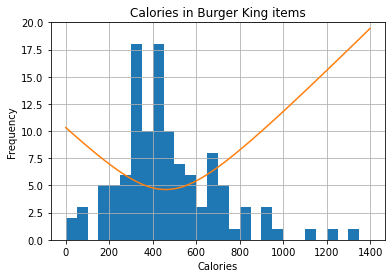

In [6]:
x = np.arange(0, 1400, 1)
y = np.array([rmse(x[i], items['Calories']) for i in range(1400)])
plt.figure()
items['Calories'].hist(bins = range(0, 1450, 50))
plt.plot(x, y * 0.02) # Scale the y values down so that the histogram is visible at the same time
plt.title('Calories in Burger King items')
plt.ylim(0, 20)
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

Where is the minimum value? We can use `np.argmin` to find out. `min` returns the minimum value; `argmin` returns the position in an array where the minimum value appears.

In [7]:
np.argmin(y)

460

In [8]:
items['Calories'].mean()

459.52991452991455

### Another loss function

<font color = green> **Mean absolute deviation:** <font color = black> The loss function defined by
    
$$ MAD(\hat y) = \frac{1}{n} \sum_{i = 0}^{n - 1} |y_i - \hat y| $$
    
Again, $\hat y$ is a predicted or estimated value.

**Exercise:** Write a function called `mad` that takes an estimate and a Series and returns the mean absolute deviation of the estimate from the values in the series. *Hint*: you can use `np.abs` to compute absolute values.

In [14]:
def mad(z, data):
    n = len(data)
    diff = data - z
    return sum(np.abs(diff)/n)

Once you have defined `mad`, the code below will work.

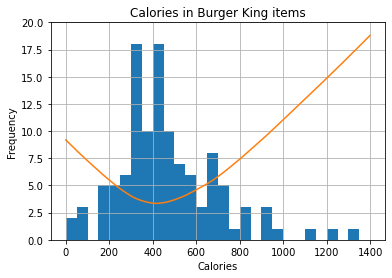

In [15]:
x = np.arange(0, 1400, 1)
y = np.array([mad(x[i], items['Calories']) for i in range(1400)])
plt.figure()
items['Calories'].hist(bins = range(0, 1450, 50))
plt.plot(x, y * 0.02) # Scale the y values down so that the histogram is visible at the same time
plt.title('Calories in Burger King items')
plt.ylim(0, 20)
plt.xlabel('Calories')
plt.ylabel('Frequency')
#plt.savefig('histnocurve.png')
plt.show()

In [11]:
np.argmin(y)

410

In [16]:
items['Calories'].median()

410.0

## A (slightly) silly approach to linear regression

In [17]:
ccdata = pd.read_csv('climate-change-2016.csv')
ccdata.head()

,year,global_temp_anomaly,CO2ppm,DJIA
0,1959,0.0596,315.97,679.36
1,1960,0.0204,316.91,615.89
2,1961,0.0775,317.64,731.14
3,1962,0.0888,318.45,652.10
4,1963,0.1068,318.99,762.95


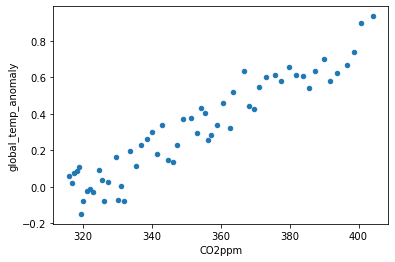

In [18]:
ccdata.plot('CO2ppm', 'global_temp_anomaly', kind = 'scatter')
plt.show()

<font color = green> **Standardized value:** <font color = black> Also known as a $z$ score; the standardized value of $x_i$ is given by the formula
    
$$ z = \frac{x - \bar x}{s} $$

where $\bar x$ is the sample mean, $s$ the sample standard deviation.

Once our data is standardized, we only have to estimate a slope. Then our model has the formula:

$\hat y_i = b x_i$

and we can plug the predicted values $\hat y_i$ into the RMSE formula and think of it as a function of $b$:

$$ RMSE(b) = \sqrt{\frac{1}{n-1} \sum_{i=0}^{n-1} (y_i - b x_i)^2 }$$

**Exercise**: Write a function called `line_rmse` that takes a slope `b`, a `Series` of `x` values and a `Series` of `y` values, and returns the RMSE of the predicted values.

In [19]:
def line_rmse(b, x, y):
    n = len(x)
    predictions = b * x
    diff = (y - predictions) ** 2
    return np.sqrt(sum(diff) / (n - 1))

In [21]:
# Standardize some data
co2std = (ccdata['CO2ppm'] - ccdata['CO2ppm'].mean()) / ccdata['CO2ppm'].std()
tempstd = (ccdata['global_temp_anomaly'] - ccdata['global_temp_anomaly'].mean()) / ccdata['global_temp_anomaly'].std()

In [22]:
guesses = np.random.uniform(-1, 1, 25)
guesses

array([ 0.638725  , -0.3719218 , -0.8674919 ,  0.85016654,  0.84399748,
       -0.31166349, -0.32413825,  0.26224895,  0.33549884,  0.91472917,
        0.09839808,  0.6682016 ,  0.42851577,  0.04241402, -0.01973627,
       -0.97313593,  0.95185533, -0.15827237,  0.69132209,  0.30482004,
       -0.22796704, -0.17176569,  0.24645617, -0.84752544, -0.17442869])

In [23]:
rmses = np.array([line_rmse(guesses[i], co2std, tempstd) for i in range(25)])
rmses

array([0.44478627, 1.35756127, 1.84285134, 0.33473734, 0.33657934,
       1.29908233, 1.3111755 , 0.75625063, 0.69059395, 0.32198508,
       0.90733467, 0.42486695, 0.60971755, 0.95991714, 1.01871589,
       1.94697371, 0.32036527, 1.15104934, 0.41004934, 0.71791375,
       1.21814515, 1.16401566, 0.77058569, 1.82319214, 1.16657607])

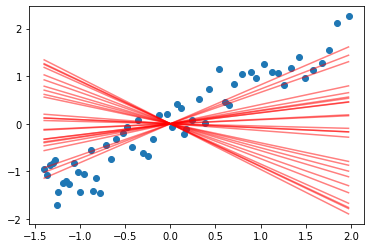

In [25]:
guesses = np.random.uniform(-1, 1, 25)
rmses = np.array([line_rmse(guesses[i], co2std, tempstd) for i in range(25)])
plt.plot(co2std, tempstd, 'o')
for i in range(25):
    y = guesses[i] * co2std
    plt.plot(co2std, y, color = 'red', alpha = 0.5)
plt.show()

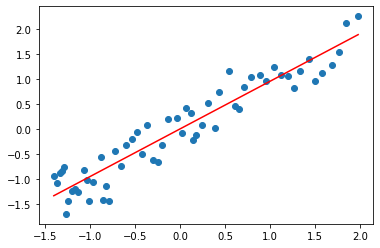

In [29]:
guesses = np.random.uniform(-1, 1, 25)
rmses = np.array([line_rmse(guesses[i], co2std, tempstd) for i in range(25)])
plt.plot(co2std, tempstd, 'o')
best_guess = guesses[np.argmin(rmses)]
y = best_guess * co2std
plt.plot(co2std, y, color = 'red')
plt.show()

Exercise: write a `line_mad` to calculate mean absolute deviation for a slope, and try finding the best line according to that.